# Python examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
baseurl = 'https://https://blocmarket.herokuapp.com/'
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '2'}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}

response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},"marketRootId":{"0":1,"1":2,"2":3,"3":4},"marketBranchId":{"0":1,"1":1,"2":1,"3":1},"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},"iMatched":{"0":true,"1":true,"2":true},"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = baseurl+'viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},"iMatched":{"0":false,"1":true},"timeStampUTC":{"0":1547982939316,"1":1547982938964},"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [1167]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [1207]:
#  baseurl = 'https://vast-depths-89393.herokuapp.com/'
# baseurl = 'https://glacial-hollows-90395.herokuapp.com/'
#baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [1208]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1209]:
response.json()

{'signingKey_hex': '20f8df45caba52bce588b8c596d215f18a9157c48ecb5106814e76d904ecc141',
 'traderId': '2',
 'verifyKey_hex': '52d9a2056135b72fc7c77ca59a01ad112fbd85102411822b82a576055b52dfeb'}

In [1210]:
url = baseurl + 'createMarket'

mkRtId = 1
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [1211]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [1212]:
response.json()

{'checks': 'False',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '2'}

In [1213]:
pd.DataFrame(response.json(), index=[0])

,checks,marketBranchId,marketMax,marketMin,marketRootId,traderId
0,False,1,1,0,1,2


In [1214]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1215]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': '2'}

In [1216]:
# View json response
pd.DataFrame(response.json(), index=[0])


,checks,marketId,price,quantity,traderId
0,True,1,0.55,1,2


In [1217]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1218]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}

In [1219]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.3462941646575928 seconds.
matched trade: 1 in 0.3212110996246338 seconds.
matched trade: 2 in 0.32288122177124023 seconds.
matched trade: 3 in 0.3259878158569336 seconds.
matched trade: 4 in 0.3196132183074951 seconds.


In [1220]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

failed to create market 1
market created: 2 in 0.24483585357666016 seconds.
market created: 3 in 0.378953218460083 seconds.
market created: 4 in 0.638267993927002 seconds.


In [1221]:
response.json()

{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 2}

In [1222]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [1223]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0,1.0
1,2,2,1,0,0.7
2,3,3,1,0,0.7
3,4,4,1,0,0.7


In [1224]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1225]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.079924,1,3,True,2019-01-21 11:27:35.541
1,1,0.079924,-1,3,True,2019-01-21 11:27:36.884
10,1,0.195331,-1,3,True,2019-01-21 11:27:39.102
11,1,0.195331,1,3,True,2019-01-21 11:27:40.440
12,1,0.202703,1,3,True,2019-01-21 11:27:40.595
13,1,0.202703,-1,3,True,2019-01-21 11:27:41.933
14,1,0.222703,-1,3,True,2019-01-21 11:27:40.761
15,1,0.222703,1,3,True,2019-01-21 11:27:42.091
16,1,0.212267,1,3,True,2019-01-21 11:27:42.252
17,1,0.212267,-1,3,True,2019-01-21 11:27:43.589


In [1226]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 0.6795041561126709 seconds.
unmatched trade: 1 in 0.671393871307373 seconds.
unmatched trade: 2 in 0.6457469463348389 seconds.
unmatched trade: 3 in 0.6226902008056641 seconds.
unmatched trade: 4 in 0.6352319717407227 seconds.


In [1227]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': '2'}

In [1228]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1229]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
52,1,0.43,-1,2,2019-01-22 09:35:56.894
53,1,0.43,-1,2,2019-01-22 09:35:57.565
54,1,0.43,-1,2,2019-01-22 09:35:58.212
55,1,0.43,-1,2,2019-01-22 09:35:58.835
56,1,0.43,-1,2,2019-01-22 09:35:59.468


In [1230]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1231]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.079924,0,3
1,1,0.099924,0,3
10,1,0.286219,0,3
11,1,0.306219,0,3
12,1,0.357253,0,3
13,1,0.377253,0,3
14,1,0.398732,0,3
15,1,0.418732,0,3
16,1,0.441228,0,3
17,1,0.461228,0,3


In [1232]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 1.2909960746765137 seconds.
matched trade: 1 in 1.2853350639343262 seconds.
matched trade: 2 in 1.3663527965545654 seconds.
matched trade: 3 in 1.309023141860962 seconds.
matched trade: 4 in 1.2208189964294434 seconds.


In [1235]:
url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1236]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,2,True,2019-01-22 09:35:43.897,0,1,-0.55,0.45
1,1,0.55,-1,2,True,2019-01-22 09:35:46.358,0,1,0.55,-0.45
10,1,0.55,-1,2,True,2019-01-22 09:35:50.244,0,1,0.55,-0.45
11,1,0.55,1,2,True,2019-01-22 09:35:50.406,0,1,-0.55,0.45
12,1,0.43,-1,2,True,2019-01-22 09:35:57.565,0,1,0.43,-0.57
13,1,0.43,-1,2,True,2019-01-22 09:35:58.212,0,1,0.43,-0.57
14,1,0.43,-1,2,True,2019-01-22 09:35:58.835,0,1,0.43,-0.57
15,1,0.43,-1,2,False,2019-01-22 09:36:01.793,0,1,0.43,-0.57
16,1,0.43,-1,2,True,2019-01-22 09:35:56.894,0,1,0.43,-0.57
17,1,0.43,1,2,True,2019-01-22 09:36:02.422,0,1,-0.43,0.57


In [1237]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [1238]:
response.json()

{'timeStampUTC': '2019-01-22 09:36:47.960609',
 'timeStampUTCSignature': 'b\'%\\xa2\\x10:\\xf6\\xf7]\\x16\\xcb\\x7f/c\\xdf\\r~W\\x11\\x11\\xab\\x85\\xec\\xa8\\n\\xdc\\x0e\\x9c\\xbe\\xb89\\x1a,\\x96aL\\xa6\\x9d\\xfe>JX\\xf7\\xe7\\x896=\\xb2\\xb6\\xb4\\xc7\\xb9\\xc8\\x14r}"\\x1dh\\xfd[\\xfb\\xc6!w\\x05\'',
 'verifyKey': 'e6376aef9f29b5ba13d98f388a2463d42e58300a4438545e769dbfa2a7432f07'}

In [1242]:
# A simple bot
url = baseurl+'createTrade'
content_maketrade['quantity'] = 1
B = 0
for i in range(10):
    # Create bounded random betwen zero and one
    dW = np.random.random()/10
    if B >0.9:
        B -= abs(dW)
    elif B <0.1:
        B += abs(dW)
    else:
        B = B + dW
    B = min(max(B, 0),1)
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(1)
    # Remove a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Increment ' + str(i) + ' at ' + str(time.time()))

Increment 0 at 1548149878.197698
Increment 1 at 1548149881.7951438
Increment 2 at 1548149885.3295438
Increment 3 at 1548149888.8830872
Increment 4 at 1548149892.407955
Increment 5 at 1548149895.9128451
Increment 6 at 1548149899.465122
Increment 7 at 1548149903.059934
Increment 8 at 1548149906.62269
Increment 9 at 1548149910.1348422


In [1243]:

url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,1,2,True,2019-01-22 09:35:43.897,0,1,-0.550000,0.450000
1,1,0.550000,-1,2,True,2019-01-22 09:35:46.358,0,1,0.550000,-0.450000
10,1,0.550000,-1,2,True,2019-01-22 09:35:50.244,0,1,0.550000,-0.450000
11,1,0.550000,1,2,True,2019-01-22 09:35:50.406,0,1,-0.550000,0.450000
12,1,0.430000,-1,2,True,2019-01-22 09:35:57.565,0,1,0.430000,-0.570000
13,1,0.430000,-1,2,True,2019-01-22 09:35:58.212,0,1,0.430000,-0.570000
14,1,0.430000,-1,2,True,2019-01-22 09:35:58.835,0,1,0.430000,-0.570000
15,1,0.430000,-1,2,False,2019-01-22 09:36:01.793,0,1,0.430000,-0.570000
16,1,0.430000,-1,2,True,2019-01-22 09:35:56.894,0,1,0.430000,-0.570000
17,1,0.430000,1,2,True,2019-01-22 09:36:02.422,0,1,-0.430000,0.570000


In [1244]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-22 09:35:43.897,1,0.550000,1,2,True,2019-01-22 09:35:43.897,0,1,-0.550000,0.450000
2019-01-22 09:35:46.358,1,0.550000,-1,2,True,2019-01-22 09:35:46.358,0,1,0.550000,-0.450000
2019-01-22 09:35:50.244,1,0.550000,-1,2,True,2019-01-22 09:35:50.244,0,1,0.550000,-0.450000
2019-01-22 09:35:50.406,1,0.550000,1,2,True,2019-01-22 09:35:50.406,0,1,-0.550000,0.450000
2019-01-22 09:35:57.565,1,0.430000,-1,2,True,2019-01-22 09:35:57.565,0,1,0.430000,-0.570000
2019-01-22 09:35:58.212,1,0.430000,-1,2,True,2019-01-22 09:35:58.212,0,1,0.430000,-0.570000
2019-01-22 09:35:58.835,1,0.430000,-1,2,True,2019-01-22 09:35:58.835,0,1,0.430000,-0.570000
2019-01-22 09:36:01.793,1,0.430000,-1,2,False,2019-01-22 09:36:01.793,0,1,0.430000,-0.570000
2019-01-22 09:35:56.894,1,0.430000,-1,2,True,2019-01-22 09:35:56.894,0,1,0.430000,-0.570000


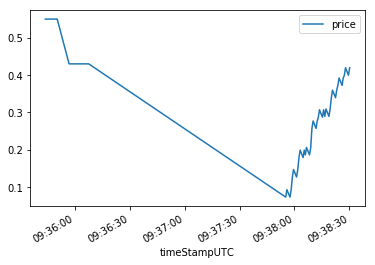

In [1245]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://localhost:7000/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://localhost:7000/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://localhost:3000/data 
~~~~

Matlab will (probably?) run these with 
~~~~
[A, curlout] = system('curlstring')
~~~~

    

# Setup for release

- Get extra database rows on Heroku
- Single 